In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('./data/spam.tsv', sep='\t')
df.head()

label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2

In [5]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [6]:
len(df)

5572

In [8]:
df.keys()

Index(['label', 'message', 'length', 'punct'], dtype='object')

In [10]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

### balance data

In [12]:
ham = df[ df['label'] == 'ham' ]
ham.head()

label                                            message  length  punct
0   ham  Go until jurong point, crazy.. Available only ...     111      9
1   ham                      Ok lar... Joking wif u oni...      29      6
3   ham  U dun say so early hor... U c already then say...      49      6
4   ham  Nah I don't think he goes to usf, he lives aro...      61      2
6   ham  Even my brother is not like to speak with me. ...      77      2

In [13]:
spam = df[df['label']=='spam']
spam.head()

label                                            message  length  punct
2   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155      6
5   spam  FreeMsg Hey there darling it's been 3 week's n...     147      8
8   spam  WINNER!! As a valued network customer you have...     157      6
9   spam  Had your mobile 11 months or more? U R entitle...     154      2
11  spam  SIX chances to win CASH! From 100 to 20,000 po...     136      8

In [14]:
ham.shape, spam.shape

((4825, 4), (747, 4))

In [20]:
ham = ham.sample(spam.shape[0])

ham.shape, spam.shape

((747, 4), (747, 4))

In [25]:
data = ham.append(spam, ignore_index=True)
data['label'].value_counts()

ham     747
spam    747
Name: label, dtype: int64

### Exploratory Data Analysis

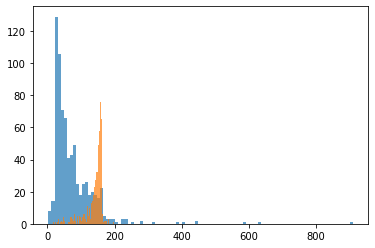

In [29]:
plt.hist(data[data['label']=='ham']['length'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['length'], bins = 100, alpha = 0.7)
plt.show()

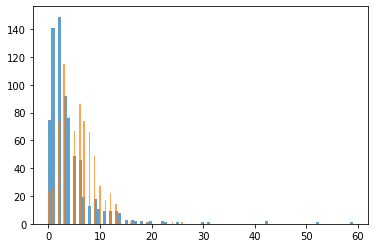

In [31]:
plt.hist(data[data['label']=='ham']['punct'], bins = 100, alpha = 0.7)
plt.hist(data[data['label']=='spam']['punct'], bins = 100, alpha = 0.7)

plt.show()

### Data Preparation

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

In [34]:
data.head()

label                                            message  length  punct
0   ham  X course it 2yrs. Just so her messages on mess...      72      1
1   ham                       Nice.nice.how is it working?      28      3
2   ham         Hanging out with my brother and his family      42      0
3   ham                 Received, understood n acted upon!      34      2
4   ham                Whatsup there. Dont u want to sleep      35      1

In [35]:
X_train, X_test, y_train, y_test = train_test_split(data['message'], data['label'], test_size = 0.3, random_state=0, shuffle = True, stratify=data['label'])

### Bag of Words Creation

In [42]:
vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)

In [46]:
X_train_vect.shape

(1045, 3730)

### Pipeline and RF

In [47]:
clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', RandomForestClassifier(n_estimators=100, n_jobs=-1))])

In [49]:
clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=None, smooth_idf=True,
                                 stop_words=None, strip_accents=None,
                                 sublinear_tf=False,
                                 token_pattern='...
                 RandomForestClassifier(bootstrap=True, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features='auto',
                                        max_leaf_nodes=None,
                               

In [51]:
y_pred = clf.predict(X_test)

In [53]:
confusion_matrix(y_test, y_pred)

array([[224,   1],
       [ 27, 197]])

In [56]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         ham       0.89      1.00      0.94       225
        spam       0.99      0.88      0.93       224

    accuracy                           0.94       449
   macro avg       0.94      0.94      0.94       449
weighted avg       0.94      0.94      0.94       449



In [57]:
accuracy_score(y_test, y_pred)

0.9376391982182628

In [59]:
clf.predict(["Hey, whassup?"])

array(['ham'], dtype=object)

In [60]:
clf.predict(["you have won tickets to the USA this summer."])

array(['ham'], dtype=object)